<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 2</p><br>

## 1. **Working with datetime data;** The object `myDate` contains the date and time. Based on this object answer the following questions and type the answer after your findings.

In [15]:
from IPython.display import display, Markdown


In [4]:
myDate = "2022-10-01 09:42:43"

a. Convert `myDate` into a datetime object with Iran time zone. Display the result.

In [4]:
from datetime import datetime ,timedelta
import pytz
import pandas as pd

In [50]:
md=datetime.strptime(myDate,'%Y-%m-%d %H:%M:%S')
md

datetime.datetime(2022, 10, 1, 9, 42, 43)

In [51]:
md.astimezone(pytz.timezone('Asia/Tehran'))

datetime.datetime(2022, 10, 1, 13, 12, 43, tzinfo=<DstTzInfo 'Asia/Tehran' +0330+3:30:00 STD>)

b. Write your codes so that it displays the week day and also the month of `myDate`.

In [60]:
result=(f"week: {md.weekday()} , day:{md.day} , month:{md.month}")
Markdown('<font face="XB Zar" font color=peru size=5>{}'.format(result))

<font face="XB Zar" font color=peru size=5>week: 5 , day:1 , month:10

c. What weekday and the month is it after exactly 100 years from `myDate`?

In [47]:
print(f"100 years after: {md+ pd.offsets.DateOffset(years=100)}")


100 years after: 2122-10-01 09:42:43


d. Add two month with myDate and display the resulting date time.

In [51]:
print(f"2 months after: {md+ pd.offsets.DateOffset(months=2)}")


2 months after: 2022-12-01 09:42:43


e. Suppose this homework is due on December 23, 2022 by 11.59PM. Compute and display how many seconds you got to complete this homework? Also compute the hours.

In [71]:
remains=(datetime.strptime("December 23, 2022 11.59PM",'%B %d, %Y %I.%M%p')-datetime.now()).total_seconds()

print(f"seconds you got to complete this homework: {int(remains)}")

seconds you got to complete this homework: 500254


f. For the years `2021` & `2022`, count the number of weekends. Which year has the highest number of Weekends?

In [76]:
import numpy as np
wd21 =np.busday_count('2021-01-01', '2022-01-01')
wd22=np.busday_count('2022-01-01', '2023-01-01')
print(f"2021:{wd21},   2022:{wd22}")


2021:261,   2022:260


g. What is the month(MM) and day(DD) on the `305`th day of the current year?

In [81]:
print(f"305th day of the year, month: {(datetime(2022,1,1)+ pd.offsets.DateOffset(days=305)).month} , day: {(datetime(2022,1,1)+ pd.offsets.DateOffset(days=305)).day}")

305th day of the year, month: 11 , day: 2


h. The Date `2022-10-20` is formatted `YYYY-MM-DD`, format it into `MM-DD-YYYY`

In [83]:
datetime.strptime("2022-10-20", '%Y-%m-%d').strftime('%m-%d-%Y')


'10-20-2022'

i. Find if the Date on the question above is the weekend or a weekday.

In [85]:
if datetime.strptime("2022-10-20", '%Y-%m-%d').weekday() > 5:
    print("is weekend")
else:
    print("is not weekend")


is not weekend


## 2. **Walmart Sales Analysis:** load and read the dataset `walmart_sales.csv` and `walmart_fuel_prices.csv`.

We will follow the following data description when working with the above 2 datasets:

 * `index:` index is a default value of count
 * `Store:` Store is represented in number ID(1,2,3,4,...)
 * `Dept:` Dept is Department in each Store represented in number ID (1,2,3,4,...)
 * `Date:` Date is in YYYY-MM-DD char format - *needs to be converted into Date data type*
 * `Weekly_Sales:` Sales of a given Dept in a given Store for the Date
 * `Temperature:` Average temperature on the Date at given Store region
 * `Fuel_Price:` Cost of the Fuel on the given Date at a given Store
 * `IsHoliday:` Is the given Date a holiday Week? 

In [5]:
dff=pd.read_csv("walmart_fuel_prices.csv",parse_dates=['Date'] , index_col="Date")
dff.head(2)

,index,Store,Temperature,Fuel_Price,IsHoliday
Date,,,,,
2010-02-05,1,1,42.31,2.572,False
2010-02-12,2,1,38.51,2.548,True


In [6]:
dfs=pd.read_csv("walmart_sales.csv",parse_dates=['Date'] , index_col="Date")
dfs.head(1)

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.5,False


In [7]:
dfs.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

 a. For both datasets, breakdown the `Date` column and create additional new columns `Year`, `Month`, and `Day`. You should now have additional 3 new columns in your both dataset. Report only the column names for both the dataset.

In [129]:
dfs.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=421570, freq=None)

In [8]:
def addymd(df):
    df['year']=df.index.to_series().apply(lambda x: x.year)
    df['month']=df.index.to_series().apply(lambda x: x.month)
    df['day']=df.index.to_series().apply(lambda x: x.day)
    return(df)


In [9]:
dfs=addymd(dfs)
dff=addymd(dff)
dfs
print(dfs.columns,dff.columns)

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'year', 'month', 'day'], dtype='object') Index(['index', 'Store', 'Temperature', 'Fuel_Price', 'IsHoliday', 'year',
       'month', 'day'],
      dtype='object')


b. In `walmart_sales`: which `Month(s)` of `Year` have the highest `Weekly_Sales`? Report the Year, Month, Store, and Dept.

In [10]:
dfs.groupby(by=['month'],as_index=False).size().sort_values('size',ascending=False).head(3)

,month,size
3,4,41332
6,7,40980
2,3,38451


In [11]:
maxmonth=dfs.groupby(by=['month'],as_index=False).size().sort_values('size',ascending=False).iloc[0,0]

In [12]:
dfs[dfs.month==maxmonth].sort_values('Weekly_Sales',ascending=False).head(1)

,Store,Dept,Weekly_Sales,IsHoliday,year,month,day
Date,,,,,,,
2012-04-06,14,92,224917.94,False,2012,4,6


c. In `walmart_sales`: calculate the average monthly sales by Department for each Store. Which Store(s) has the highest average monthly sales on the department(s)? Report the Store, Department, Date.

In [13]:
dfs.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,day
0,1,1,2010-02-05,24924.5,False,2010,2,5


In [13]:
print(f'Store(s) has the highest average monthly sales on the department(s):')
# Markdown('<font face="XB Zar" font color=peru size=5>{}'.format(result))
(dfs.groupby(by=['Store','month','Dept'],as_index=False).aggregate({'Weekly_Sales':'mean'}).sort_values('Weekly_Sales',ascending=False).head(10))


Store(s) has the highest average monthly sales on the department(s):


,Store,month,Dept,Weekly_Sales
8580,10,11,72,276410.157500
30285,35,11,72,219788.678750
8656,10,12,72,214196.733000
12150,14,11,92,206536.683750
12224,14,12,92,199630.543000
7903,10,2,72,199603.285000
1715,2,11,92,198855.816250
11487,14,2,92,198124.121667
17479,20,11,72,191089.831250
8606,10,12,7,191064.291000


d. In `walmart_sales`: which month of year `2011` has the highest overall sales by Store? Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. After that do the same for `2012`. Does the highest sales per month fall on the same holiday for both years? Report your findings for both year.


/tmp/ipykernel_116/4118551104.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dm.loc[:,{'y1','Weekly_Sales'}].plot.line(figsize =(17,2))


<AxesSubplot: xlabel='Date'>

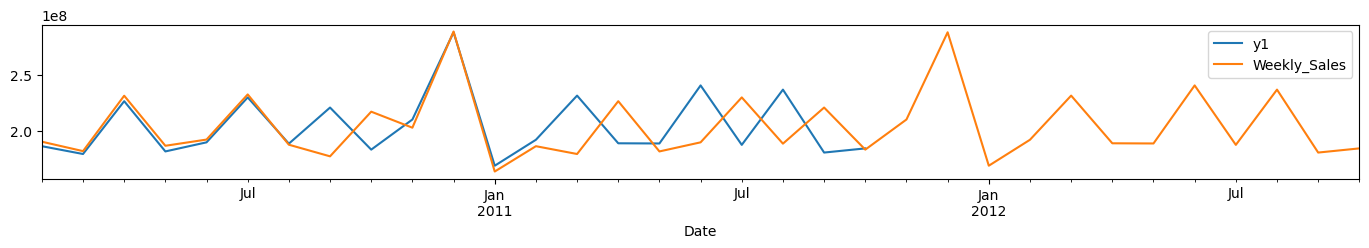

In [14]:
dm=dfs.resample("M").sum()
dm['y1'] = dm['Weekly_Sales'].shift(-12, freq="M")
dm.loc[:,{'y1','Weekly_Sales'}].plot.line(figsize =(17,2))

In [16]:
dfs.year.unique()

array([2010, 2011, 2012])

In [17]:
dfs[dfs['year']==2011].groupby(['month']).aggregate({'Weekly_Sales':'sum'}).sort_values('Weekly_Sales',ascending=False).head(1)

,Weekly_Sales
month,
12,2.880781e+08


In [18]:
dfs[dfs['year']==2010].groupby(['month']).aggregate({'Weekly_Sales':'sum'}).sort_values('Weekly_Sales',ascending=False).head(1)

,Weekly_Sales
month,
12,2.887605e+08


In [19]:
from datetime import date
import holidays
us_holidays = holidays.US()

In [20]:
holidays.US(years=2011)


{datetime.date(2011, 1, 1): "New Year's Day", datetime.date(2011, 1, 17): 'Martin Luther King Jr. Day', datetime.date(2011, 2, 21): "Washington's Birthday", datetime.date(2011, 5, 30): 'Memorial Day', datetime.date(2011, 7, 4): 'Independence Day', datetime.date(2011, 9, 5): 'Labor Day', datetime.date(2011, 10, 10): 'Columbus Day', datetime.date(2011, 11, 11): 'Veterans Day', datetime.date(2011, 11, 24): 'Thanksgiving', datetime.date(2011, 12, 25): 'Christmas Day', datetime.date(2011, 12, 26): 'Christmas Day (Observed)'}

In [21]:
holidays.US(years=2010)


{datetime.date(2010, 1, 1): "New Year's Day", datetime.date(2010, 12, 31): "New Year's Day (Observed)", datetime.date(2010, 1, 18): 'Martin Luther King Jr. Day', datetime.date(2010, 2, 15): "Washington's Birthday", datetime.date(2010, 5, 31): 'Memorial Day', datetime.date(2010, 7, 4): 'Independence Day', datetime.date(2010, 7, 5): 'Independence Day (Observed)', datetime.date(2010, 9, 6): 'Labor Day', datetime.date(2010, 10, 11): 'Columbus Day', datetime.date(2010, 11, 11): 'Veterans Day', datetime.date(2010, 11, 25): 'Thanksgiving', datetime.date(2010, 12, 25): 'Christmas Day', datetime.date(2010, 12, 24): 'Christmas Day (Observed)'}

In [22]:
#نتوانستم تعطیلات را بگیرم
result='''

مقایسه دو سال ۲۰۱۱و۲۰۱۰ ماههای پر فروش و تعطیلات یکی بود
باتوجه به نبودن ماه آخر ۲۰۱۲ به جای آن ۲۰۱۰ گذاشته شد
'''
Markdown('<font face="XB Zar" font color=peru size=5>{}'.format(result))

<font face="XB Zar" font color=peru size=5>
نتوانستم تعطیلات را بگیرم
مقایسه دو سال ۲۰۱۱و۲۰۱۰ ماههای پر فروش و تعطیلات یکی بود
باتوجه به نبودن ماه آخر ۲۰۱۲ به جای آن ۲۰۱۰ گذاشته شد


 e. In `walmart_sales`: report the lowest sales per month for the year `2011` for `IsHoliday == TRUE`. Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Do the same for `2012` and report if the lowest sales are on the same month.

In [23]:
dfs[(dfs.year==2011)&(dfs.IsHoliday)].groupby(['month','day'],as_index=False).aggregate({'Weekly_Sales':'sum'}).sort_values('Weekly_Sales',ascending=False)

,month,day,Weekly_Sales
2,11,25,66593605.26
0,2,11,47336192.79
1,9,9,46763227.53
3,12,30,46042461.04


In [24]:
holidays.US(2011,1,1)

{datetime.date(2011, 1, 1): "New Year's Day", datetime.date(2011, 1, 17): 'Martin Luther King Jr. Day', datetime.date(2011, 2, 21): "Washington's Birthday", datetime.date(2011, 5, 30): 'Memorial Day', datetime.date(2011, 7, 4): 'Independence Day', datetime.date(2011, 9, 5): 'Labor Day', datetime.date(2011, 10, 10): 'Columbus Day', datetime.date(2011, 11, 11): 'Veterans Day', datetime.date(2011, 11, 24): 'Thanksgiving', datetime.date(2011, 12, 25): 'Christmas Day', datetime.date(2011, 12, 26): 'Christmas Day (Observed)'}

f. In `walmart_sales`: We have 45 unique stores. Generate a nice plot on the total sales by store for the year `2012`. Report the Store number.

In [25]:
dfs2012=dfs[(dfs.year==2012)].groupby(['Store'],as_index=False).aggregate({'Weekly_Sales':'sum'})
dfs2012.head(10)

,Store,Weekly_Sales
0,1,68202058.02
1,2,81496695.37
2,3,18024439.50
3,4,92771189.24
4,5,14168838.13
5,6,66315047.00
6,7,25367556.47
7,8,39233920.13
8,9,23974029.58
9,10,78228616.94


In [ ]:
خط میانگین درست نشد

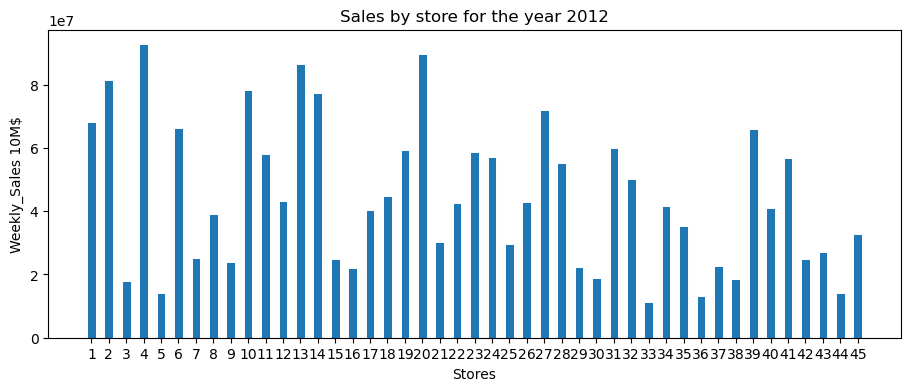

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# fig, ax = plt.subplots()
fig = plt.figure(figsize =(11, 4))
plt.bar(dfs2012.Store, dfs2012.Weekly_Sales, width=0.5, edgecolor="white", linewidth=0.7 )
plt.title('Sales by store for the year 2012')
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales 10M$')
plt.xticks(dfs2012.Store)
plt.show()

g. In `walmart_fuel_prices`: For the year `2011` do you think higher the `temperature` relates to higher `fuel price`? Support your answer with a nice plot.

In [29]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2010-02-05 to 2013-07-26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8190 non-null   int64  
 1   Store        8190 non-null   int64  
 2   Temperature  8190 non-null   float64
 3   Fuel_Price   8190 non-null   float64
 4   IsHoliday    8190 non-null   bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 586.0 KB


 h. In `walmart_fuel_prices`: For the year `2010` which `Store` had the lowest Fuel Price? Report the `month` and `temperature`. On the same `month`, what was the highest fuel price for the store? Report the difference.

In [30]:
dffmin=dff["2010"].sort_values('Fuel_Price').head(1).Fuel_Price.values
dffstore=dff["2010"].sort_values('Fuel_Price').head(1).Store.values
dffmonth=dff["2010"].sort_values('Fuel_Price').head(1).Fuel_Price.index.month.values



/tmp/ipykernel_116/1140485142.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dffmin=dff["2010"].sort_values('Fuel_Price').head(1).Fuel_Price.values
/tmp/ipykernel_116/1140485142.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dffstore=dff["2010"].sort_values('Fuel_Price').head(1).Store.values
/tmp/ipykernel_116/1140485142.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dffmonth=dff["2010"].sort_values('Fuel_Price').head(1).Fuel_Price.index.month.values


In [31]:
dff2=dff["2010-02"]
dffmax=dff2[dff2['Store']==36].sort_values('Fuel_Price',ascending=False).head(1).Fuel_Price.values


/tmp/ipykernel_116/1853908742.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dff2=dff["2010-02"]


In [32]:
result=(f"Difference Max and MIN Price: store {dffstore} , month:{dffmonth} is: {dffmax-dffmin} $ ")
Markdown('<font face="XB Zar" font color=peru size=7>{}'.format(result))


<font face="XB Zar" font color=peru size=7>Difference Max and MIN Price: store [36] , month:[2] is: [0.073] $ 

i. In `walmart_fuel_prices`: For the `IsHoliday == TRUE`, which month has the lowest `Fuel Price` for the year `2012`? name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Also report month of the highest fuel price and name of the holiday.

In [37]:
dff.head(3)

,index,Store,Temperature,Fuel_Price,IsHoliday,year,month,day
Date,,,,,,,,
2010-02-05,1,1,42.31,2.572,False,2010,2,5
2010-02-12,2,1,38.51,2.548,True,2010,2,12
2010-02-19,3,1,39.93,2.514,False,2010,2,19


In [36]:
dff.IsHoliday

Date
2010-02-05    False
2010-02-12     True
2010-02-19    False
2010-02-26    False
2010-03-05    False
              ...  
2013-06-28    False
2013-07-05    False
2013-07-12    False
2013-07-19    False
2013-07-26    False
Name: IsHoliday, Length: 8190, dtype: bool

In [2]:
from datetime import datetime ,timedelta
import pytz
import pandas as pd

## 3. **COVID19 Time Series Data:**

<br/>
Download the data from
<a target='_blank' href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv">[github link]</a>
(https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv) 

<br/>
<br/>
The link above contains a time-series data for COVID-19 confirmed cases in the US. Limit the data to only use `New York State` and please answer the following questions:



a. What is the total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?


In [16]:
result=(f"داده مشکل داره و تکراریه؟ ")
Markdown('<font face="XB Zar" font color=peru size=7>{}'.format(result))

<font face="XB Zar" font color=peru size=7>داده مشکل داره و تکراریه؟ 

In [3]:
dff=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18752,18752,18847,18847,18847,18847,18847,18847,18847,18961
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,66951,66951,67221,67221,67221,67221,67221,67221,67221,67496


b. On what date has the highest confirmed cases? Demonstrate using a suitable graph for all the available data.


In [12]:
dff.iloc[1:10,1:11]

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key
1,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US"
2,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US"
3,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US"
4,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US"
5,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,"Bullock, Alabama, US"
6,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,"Butler, Alabama, US"
7,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,"Calhoun, Alabama, US"
8,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,"Chambers, Alabama, US"
9,US,USA,840,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,"Cherokee, Alabama, US"


In [7]:
dff[dff['Province_State']=='Nebraska'].

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22
1718,84031001,US,USA,840,31001.0,Adams,Nebraska,US,40.524494,-98.501178,...,7441,7441,7441,7441,7441,7441,7441,7441,7441,7441
1719,84031003,US,USA,840,31003.0,Antelope,Nebraska,US,42.176955,-98.066628,...,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
1720,84031005,US,USA,840,31005.0,Arthur,Nebraska,US,41.568961,-101.695956,...,34,34,34,34,34,34,34,34,34,34
1721,84031007,US,USA,840,31007.0,Banner,Nebraska,US,41.546344,-103.711433,...,99,99,99,99,99,99,99,99,99,99
1722,84031009,US,USA,840,31009.0,Blaine,Nebraska,US,41.913117,-99.976778,...,76,76,76,76,76,76,76,76,76,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,84031177,US,USA,840,31177.0,Washington,Nebraska,US,41.528157,-96.220199,...,5245,5245,5245,5245,5245,5245,5245,5245,5245,5245
1809,84031179,US,USA,840,31179.0,Wayne,Nebraska,US,42.209345,-97.119270,...,2079,2079,2079,2079,2079,2079,2079,2079,2079,2079
1810,84031181,US,USA,840,31181.0,Webster,Nebraska,US,40.176426,-98.500199,...,787,787,787,787,787,787,787,787,787,787
1811,84031183,US,USA,840,31183.0,Wheeler,Nebraska,US,41.914827,-98.527989,...,136,136,136,136,136,136,136,136,136,136


c. Which County has the highest daily confirmed cases? Report both the County name and the date


In [23]:
# TODO

d. Identify two countries that have top total confirmed cases. Generate a time series plot of daily confirm cases for these two countries.


In [24]:
# TODO

e. Show the total confirmed cases for all the locations in an interactive world map (hint: you may use `leaflet` package in `python`.


In [ ]:
# TODO